In [1]:
# Import libraries
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
from IPython import display

In [2]:
# Load the created model
model = load_model('numeric_model.h5')

In [3]:
# Create the array of the right shape to feed into the keras model
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

<H3>Input Image File:</H3>

In [49]:
image_path = 'test_digits/7_06.jpg'

In [50]:
image = Image.open(image_path).convert('RGB')

In [51]:
# Resize the image to a 224x224:
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

In [52]:
# Turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

In [53]:
# Predict
prediction = model.predict(data)


Sorry, since the following image is recognized with low probability (< 0.6), we ignored the result. Recognized digit is: None



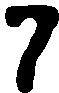

In [54]:
# Print corresponding label
# Digits only
for i in range(10):
    if prediction[0][i] >= 0.6:
        rec_digit = i
        print()
        print('The following image is recognized as', rec_digit, 'with probability of', round(prediction[0][i], 2))
        break
    elif i == 9: 
        rec_digit = None
        print()
        print("Sorry, since the following image is recognized with low probability (< 0.6), we ignored the result. Recognized digit is:", rec_digit) 
        
# Display Image
print()
display.Image(image_path)

In [55]:
prediction[0]

array([1.5323244e-01, 8.3065279e-02, 1.5132983e-01, 8.2690427e-03,
       1.1342165e-02, 1.1872059e-01, 2.2784344e-04, 4.6974212e-01,
       1.8546412e-05, 4.0520723e-03], dtype=float32)